# PKW Zulassungen (Gebraucht und Neu) ab 2000

Vorgehen:

- Abfragen der Daten für Gebraucht- und Neuwagen mit Hinzufügen der Bezeichnungen für Code
- Erstellung eines Datums basierend auf Monat und Jahr
- Gruppierung für Neu- und Gebrauchtwagen zur gesamten Ansicht
- Für Markenansicht wurden die Zulassungen für die unterschiedlichen Markenländer (VW D, VW GB) aggregiert

In [1]:
##Imports

import pandas as pd
import requests
import warnings
from requests.packages.urllib3.exceptions import InsecureRequestWarning
import locale
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

In [2]:
## Convert datetime, set Cipher and hide warnings

#Set local to match the date in german speaking countries
locale.setlocale(locale.LC_ALL, 'de_AT.utf8')
requests.packages.urllib3.util.ssl_.DEFAULT_CIPHERS += 'HIGH:!DH:!aNULL'
try:
    requests.packages.urllib3.contrib.pyopenssl.DEFAULT_SSL_CIPHER_LIST += 'HIGH:!DH:!aNULL'
except AttributeError:
    # no pyopenssl support used / needed / available
    pass

import warnings
warnings.filterwarnings("ignore")

In [3]:
## Download GebrauchtwagenData 
#import all necessary csv files
url_list = ["http://data.statistik.gv.at/data/OGD_f0760ext_OD_PkwGZL_1.csv", #data
    "http://data.statistik.gv.at/data/OGD_f0760ext_OD_PkwGZL_1_HEADER.csv", #header
    "http://data.statistik.gv.at/data/OGD_f0760ext_OD_PkwGZL_1_C-J59-0.csv", #automarken
    "http://data.statistik.gv.at/data/OGD_f0760ext_OD_PkwGZL_1_C-A10-0.csv", #datum
    "http://data.statistik.gv.at/data/OGD_f0760ext_OD_PkwGZL_1_C-EK7-0.csv" #fahrzeugtyp
]

# empty lists to store the filenames and the dataframes
filename_list = ["data", "header", "marke", "datum", "typ"]
#Own key for filename (same name as filenames but without .csv)
dataframes = {}

warnings.simplefilter('ignore',InsecureRequestWarning)
# Using for loop 
	
#Create the csv
for i in range(len(url_list)):
    open(filename_list[i]+".csv", 'wb').write(requests.get(url_list[i], verify=False).content)

#Read csv and add to dataframe
for i in range(len(filename_list)):
    dataframes[filename_list[i]] = pd.read_csv(filename_list[i]+".csv", sep=";", header=0)


In [4]:
## Merge Data to get a whole dataframe

#Merge to get the automarkenname
dfgesamt = dataframes["data"].merge(dataframes["marke"], left_on=["C-J59-0"], right_on=["code"],  how='left')[['name','C-A10-0', 'C-EK7-0', 'F-ISIS-1']]

#Rename columns
dfgesamt.columns = ['marke', 'C-A10-0', 'C-EK7-0', 'Anzahl']

#Replace Second Column with date
dfgesamt = dfgesamt.merge(dataframes["datum"], left_on=["C-A10-0"], right_on=["code"],  how='left')[['marke','name', 'C-EK7-0', 'Anzahl']]

#Rename columns
dfgesamt.columns = ['marke','Datum', 'C-EK7-0', 'Anzahl']

#ToDo Replace Third Column with Type
dfgesamt = dfgesamt.merge(dataframes["typ"], left_on=["C-EK7-0"], right_on=["code"],  how='left')[['marke','Datum', 'name', 'Anzahl']]

#Rename columns
dfgesamt.columns = ['marke','Datum', 'Fahrzeugtyp', 'Anzahl']


In [5]:
## Convert Datumcolumn to DateType 


#Split Month and Year
dfgesamt[['Monat','Jahr']] = dfgesamt["Datum"].str.split(" ",expand=True,)


#Convert to datetime
dfgesamt["Datum"] = pd.to_datetime(dfgesamt['Jahr'].astype(str)  + dfgesamt['Monat'], format='%Y%B')


#Drop tmp columns
dfgesamt = dfgesamt.drop(columns=['Jahr', 'Monat'])

In [6]:
## Download NeuwagenData 
#import all necessary csv files
url_list_neuwagen = ["http://data.statistik.gv.at/data/OGD_fkfzul0759_OD_PkwNZL_1.csv", #data
    "http://data.statistik.gv.at/data/OGD_fkfzul0759_OD_PkwNZL_1_HEADER.csv", #header
    "http://data.statistik.gv.at/data/OGD_fkfzul0759_OD_PkwNZL_1_C-J59-0.csv", #automarken
    "http://data.statistik.gv.at/data/OGD_fkfzul0759_OD_PkwNZL_1_C-A10-0.csv", #datum
    "http://data.statistik.gv.at/data/OGD_fkfzul0759_OD_PkwNZL_1_C-EK7-0.csv" #fahrzeugtyp
]

#Own key for filename (same name as filenames but without .csv)
dataframesNeuwagen = {}

# Using for loop 

#Create the csv
for i in range(len(url_list)):
    open(filename_list[i]+"_neuwagen.csv", 'wb').write(requests.get(url_list_neuwagen[i], verify=False).content)

#Read csv and add to dataframe
for i in range(len(filename_list)):
    dataframesNeuwagen[filename_list[i]] = pd.read_csv(filename_list[i]+"_neuwagen.csv", sep=";", header=0)

In [7]:
## Merge Data in Neuwagen to get a whole dataframe

#Merge to get the automarkenname
dfgesamt_neuwagen = dataframesNeuwagen["data"].merge(dataframesNeuwagen["marke"], left_on=["C-J59-0"], right_on=["code"],  how='left')[['name','C-A10-0', 'C-EK7-0', 'F-ISIS-1']]

#Rename columns
dfgesamt_neuwagen.columns = ['marke', 'C-A10-0', 'C-EK7-0', 'Anzahl']

#Replace Second Column with date
dfgesamt_neuwagen = dfgesamt_neuwagen.merge(dataframesNeuwagen["datum"], left_on=["C-A10-0"], right_on=["code"],  how='left')[['marke','name', 'C-EK7-0', 'Anzahl']]

#Rename columns
dfgesamt_neuwagen.columns = ['marke','Datum', 'C-EK7-0', 'Anzahl']

#ToDo Replace Third Column with Type
dfgesamt_neuwagen = dfgesamt_neuwagen.merge(dataframesNeuwagen["typ"], left_on=["C-EK7-0"], right_on=["code"],  how='left')[['marke','Datum', 'name', 'Anzahl']]

#Rename columns
dfgesamt_neuwagen.columns = ['marke','Datum', 'Fahrzeugtyp', 'Anzahl']


In [8]:
## Convert Datumcolumn to DateType 


#Split Month and Year
dfgesamt_neuwagen[['Monat','Jahr']] = dfgesamt_neuwagen["Datum"].str.split(" ",expand=True,)


#Convert to datetime
dfgesamt_neuwagen["Datum"] = pd.to_datetime(dfgesamt_neuwagen['Jahr'].astype(str)  + dfgesamt_neuwagen['Monat'], format='%Y%B')


#Drop tmp columns
dfgesamt_neuwagen = dfgesamt_neuwagen.drop(columns=['Jahr', 'Monat'])

In [9]:
## Split Data based on Marke

dfList = []
dfList_Neuwagen = []
dict_of_regions = dict(iter(dfgesamt.groupby('marke')))
dict_of_regions_neuwagen = dict(iter(dfgesamt_neuwagen.groupby('marke')))



for key in dict_of_regions:
    dfList.append(pd.DataFrame(dict_of_regions.get(key)))

for key in dict_of_regions_neuwagen:
    dfList_Neuwagen.append(pd.DataFrame(dict_of_regions_neuwagen.get(key)))

In [10]:
#Get the Amount of cars overall
gesamt= {}
for df in dfList:
    for index, row in df.iterrows():
        if row['Datum'] in gesamt:
            gesamt[row['Datum']] = {'Gebrauchtwagen':  gesamt[row['Datum']]['Gebrauchtwagen'] + row['Anzahl']}
        else:
            gesamt[row["Datum"]] = {'Gebrauchtwagen': row['Anzahl']}
        
        
        
#Get the Amount of Neuwagen too
for df in dfList_Neuwagen:
    for index, row in df.iterrows():
        if row['Datum'] in gesamt:
            if('Neuwagen' in gesamt[row['Datum']]):        
                gesamt[row['Datum']] = {'Gebrauchtwagen': gesamt[row['Datum']]['Gebrauchtwagen'], 'Neuwagen': gesamt[row['Datum']]['Neuwagen'] + row['Anzahl']}
            else:
                gesamt[row['Datum']] = {'Gebrauchtwagen': gesamt[row['Datum']]['Gebrauchtwagen'], 'Neuwagen': row['Anzahl']}
            #gesamt[row['Datum']] = gesamt[row['Datum']] + row['Anzahl']
        else:
            gesamt[row['Datum']] = {'Gebrauchtwagen': 0, 'Neuwagen': row['Anzahl']}
            #gesamt[row["Datum"]] = row['Anzahl']

In [11]:
#Group marken by markenname so that several countries will be in one dataframe
#diction = dict(iter(dfgesamt.groupby([dfgesamt['marke'].str[:4]])))
marken = {}
for index, row in dfgesamt.iterrows():
    subString = row['marke'][0:row['marke'].find(' <')]
    if "(" in subString:
        subString = subString[0: subString.find(' (')]
        
    if subString in marken:
        if row['Datum'] in marken[subString]:
            marken[subString][row['Datum']] = {'Gebrauchtwagen': marken[subString][row['Datum']]['Gebrauchtwagen'] + row['Anzahl'], 'Neuwagen': 0}
        else:
            marken[subString][row['Datum']] = {'Gebrauchtwagen': row['Anzahl'], 'Neuwagen': 0}
    else:
        marken[subString] = {row['Datum']: {'Gebrauchtwagen': row['Anzahl'], 'Neuwagen': 0}}

        
for index, row in dfgesamt_neuwagen.iterrows():
    subString = row['marke'][0:row['marke'].find(' <')]
    if "(" in subString:
        subString = subString[0: subString.find(' (')]
    if subString in marken:
        if row['Datum'] in marken[subString]:
            marken[subString][row['Datum']]['Neuwagen'] = row['Anzahl']
        else:
            marken[subString] = {row['Datum']: {'Gebrauchtwagen': 0, 'Neuwagen': row['Anzahl']}}
    else:
        marken[subString] = {row['Datum']: {'Gebrauchtwagen': 0, 'Neuwagen': row['Anzahl']}}
        #marken[row['marke']] = {'Gebrauchtwagen': {row['Datum']: 0}, 'Neuwagen':{row['Datum']: }}

In [12]:
'''
#Create dictionary for marken
for index, row in dfgesamt.iterrows():
    #print(row['Datum'])
    if row['marke'] in marken:
        marken[row['marke']][row['Datum']] = {'Gebrauchtwagen': row['Anzahl'], 'Neuwagen': 0}
    else: 
        marken[row['marke']] = {row['Datum']: {'Gebrauchtwagen': row['Anzahl'], 'Neuwagen': 0}}
    
for index, row in dfgesamt_neuwagen.iterrows():   
    if row['marke'] in marken:
        #marken[row['marke']]['Neuwagen'] = {row['Datum']: row['Anzahl']}

        if(row['Datum'] in marken[row['marke']]):
            marken[row['marke']][row['Datum']]['Neuwagen'] = row['Anzahl']
        else:
            marken[row['marke']] = {row['Datum']: {'Gebrauchtwagen': 0, 'Neuwagen': row['Anzahl']}}
    else:
        marken[row['marke']] = {row['Datum']: {'Gebrauchtwagen': 0, 'Neuwagen': row['Anzahl']}}
        #marken[row['marke']] = {'Gebrauchtwagen': {row['Datum']: 0}, 'Neuwagen':{row['Datum']: }}
'''

"\n#Create dictionary for marken\nfor index, row in dfgesamt.iterrows():\n    #print(row['Datum'])\n    if row['marke'] in marken:\n        marken[row['marke']][row['Datum']] = {'Gebrauchtwagen': row['Anzahl'], 'Neuwagen': 0}\n    else: \n        marken[row['marke']] = {row['Datum']: {'Gebrauchtwagen': row['Anzahl'], 'Neuwagen': 0}}\n    \nfor index, row in dfgesamt_neuwagen.iterrows():   \n    if row['marke'] in marken:\n        #marken[row['marke']]['Neuwagen'] = {row['Datum']: row['Anzahl']}\n\n        if(row['Datum'] in marken[row['marke']]):\n            marken[row['marke']][row['Datum']]['Neuwagen'] = row['Anzahl']\n        else:\n            marken[row['marke']] = {row['Datum']: {'Gebrauchtwagen': 0, 'Neuwagen': row['Anzahl']}}\n    else:\n        marken[row['marke']] = {row['Datum']: {'Gebrauchtwagen': 0, 'Neuwagen': row['Anzahl']}}\n        #marken[row['marke']] = {'Gebrauchtwagen': {row['Datum']: 0}, 'Neuwagen':{row['Datum']: }}\n"

# Visualisierung

None


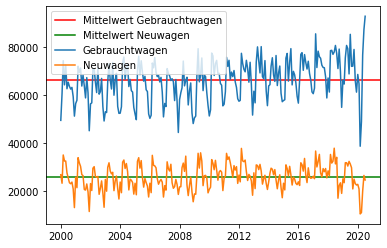

None


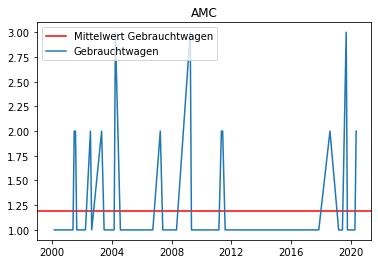

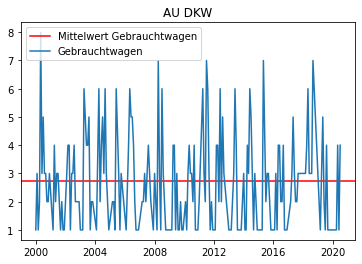

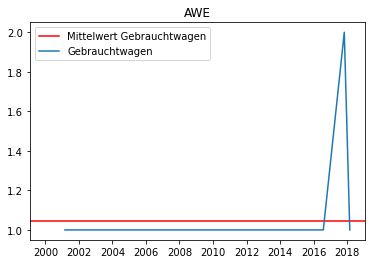

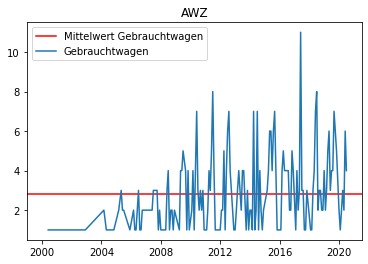

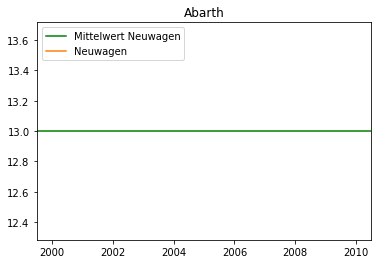

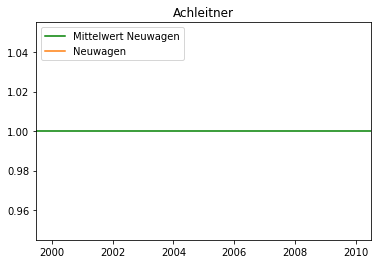

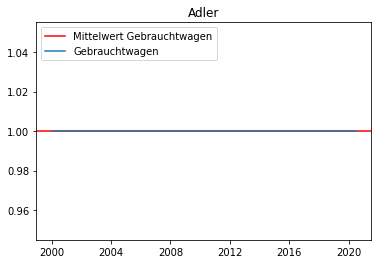

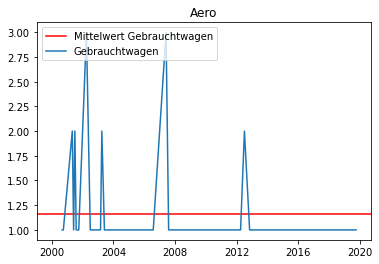

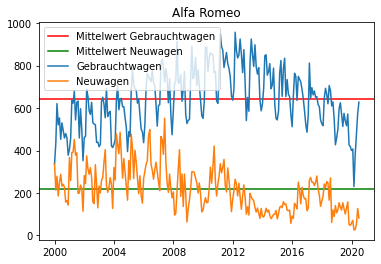

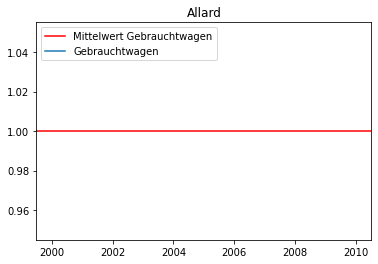

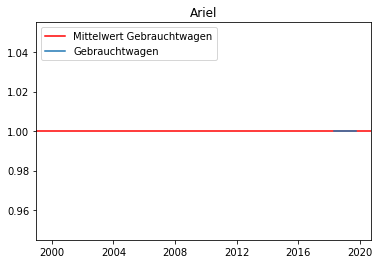

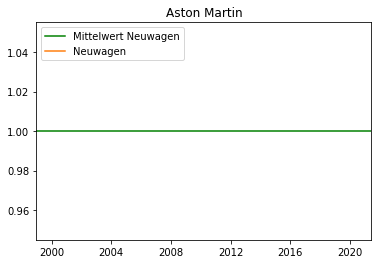

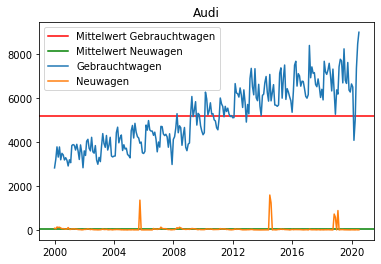

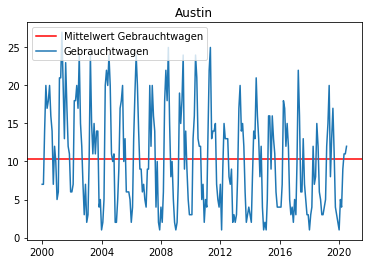

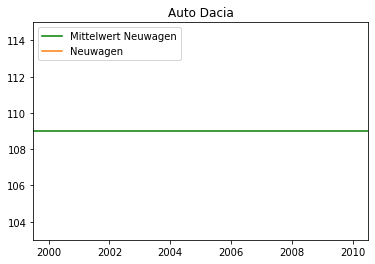

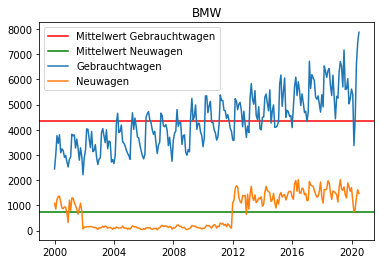

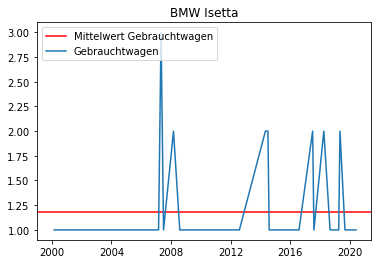

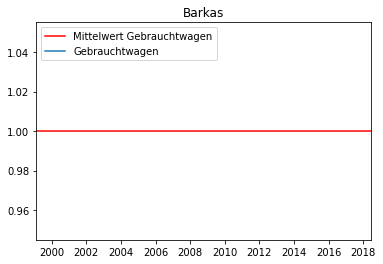

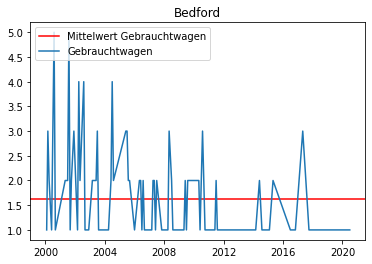

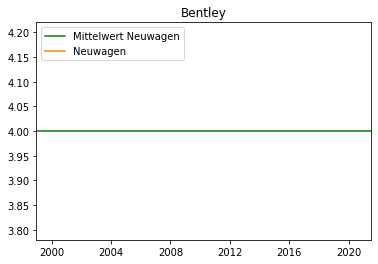

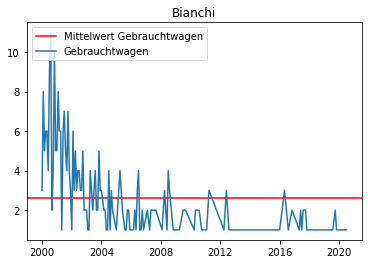

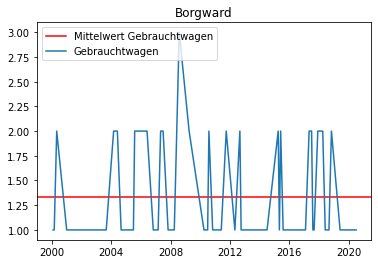

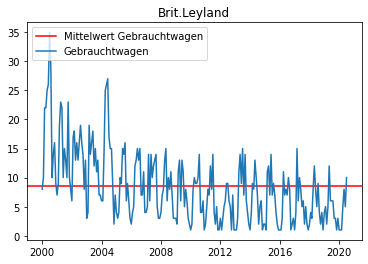

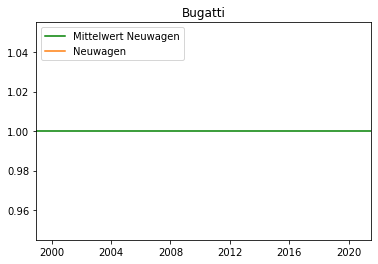

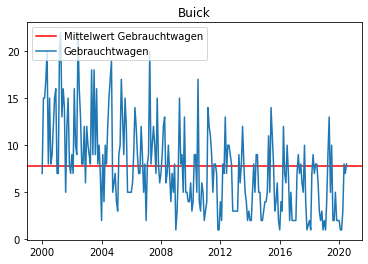

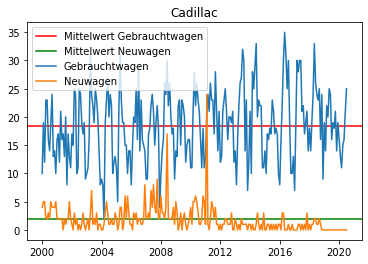

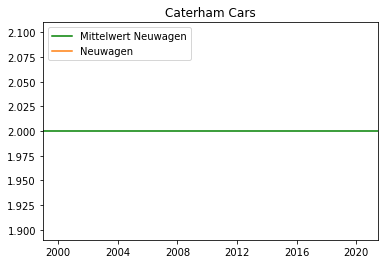

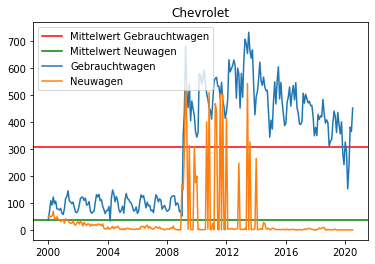

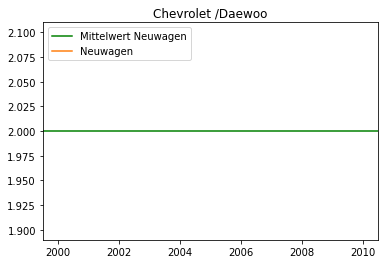

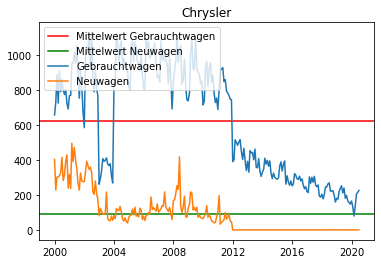

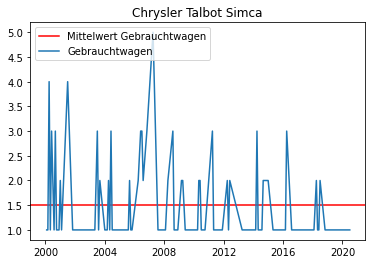

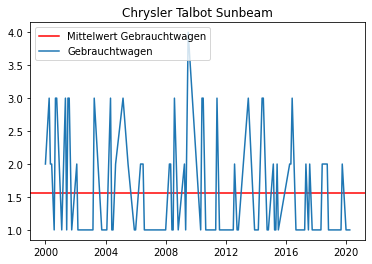

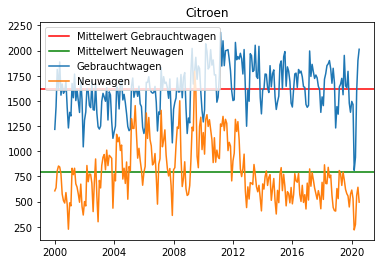

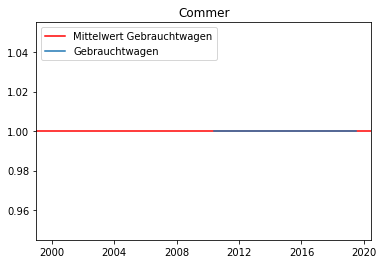

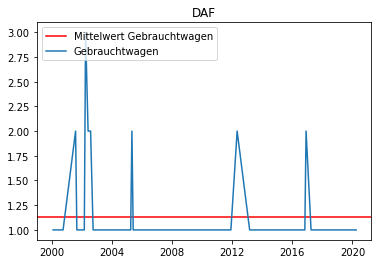

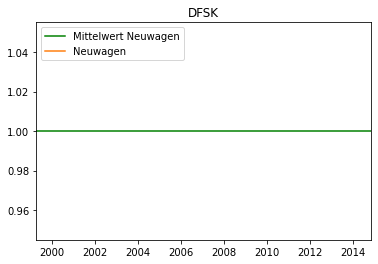

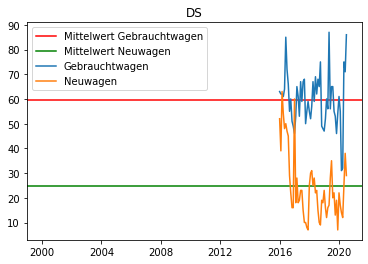

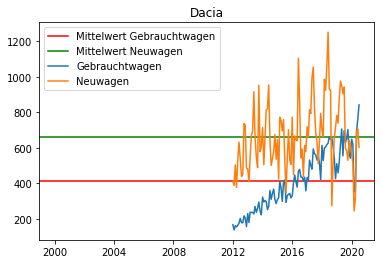

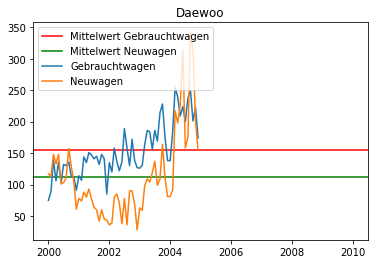

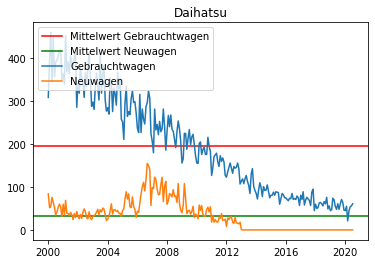

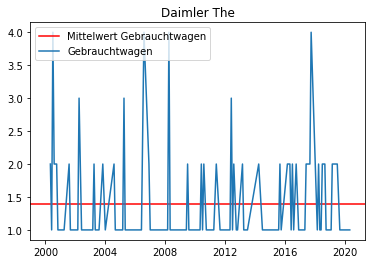

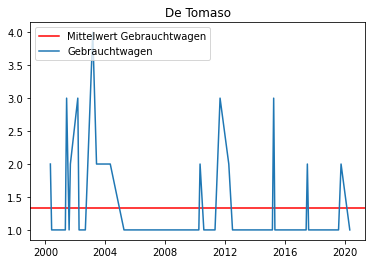

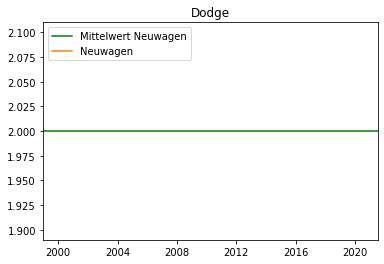

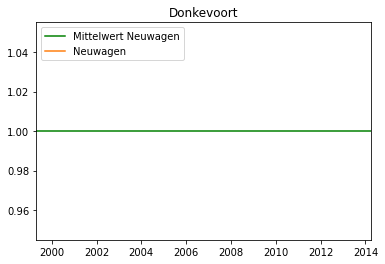

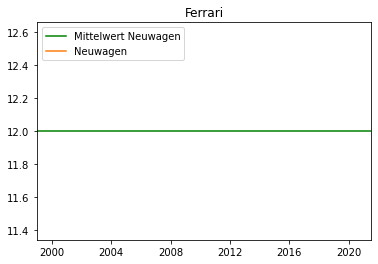

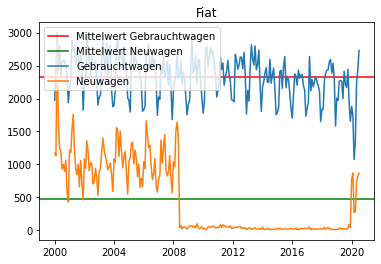

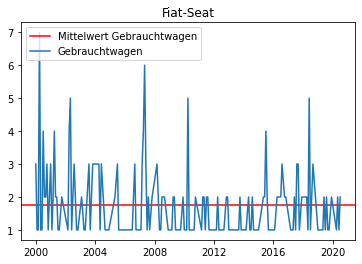

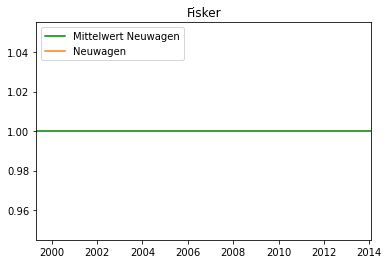

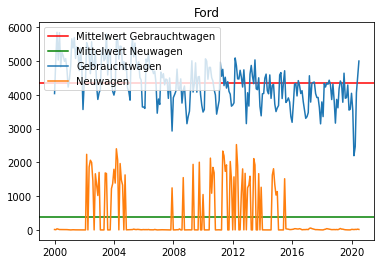

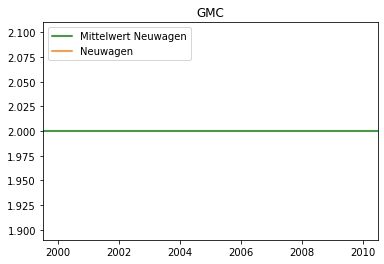

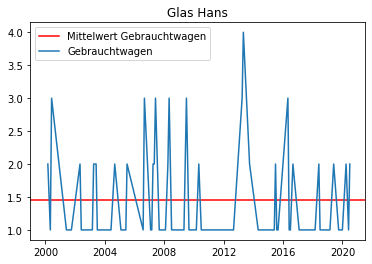

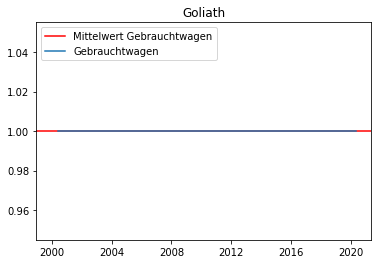

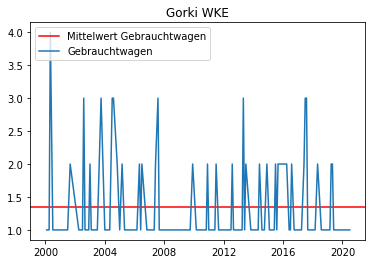

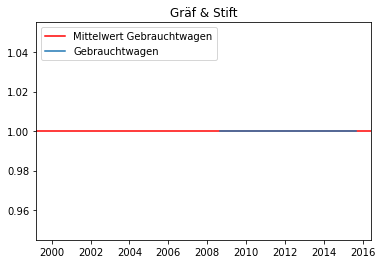

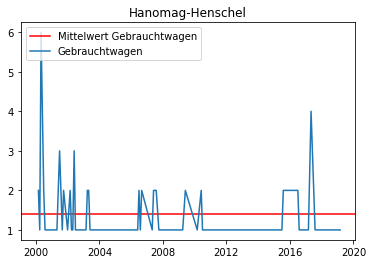

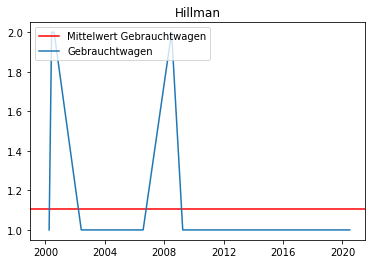

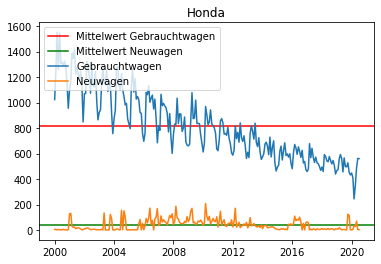

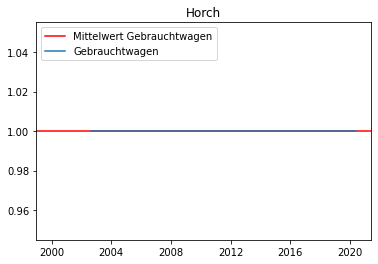

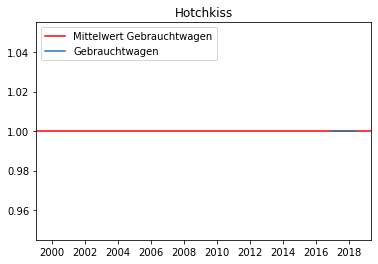

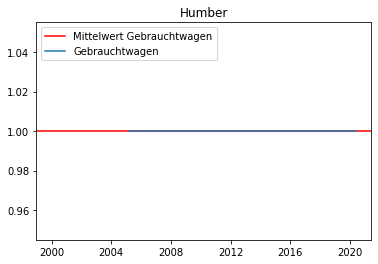

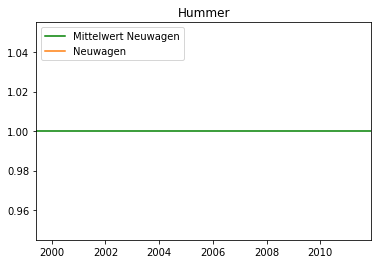

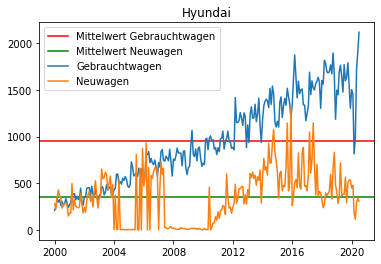

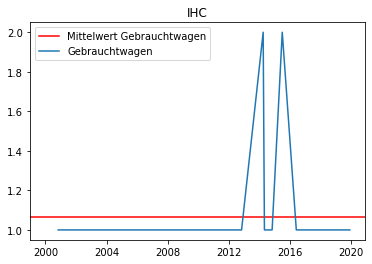

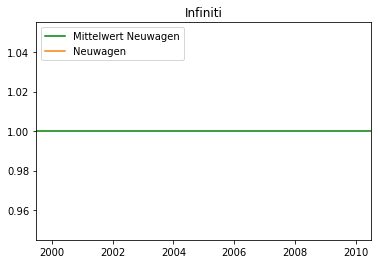

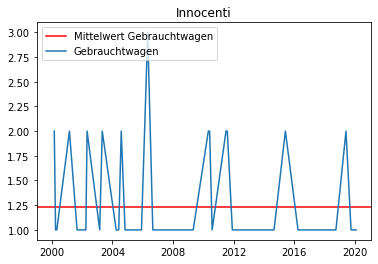

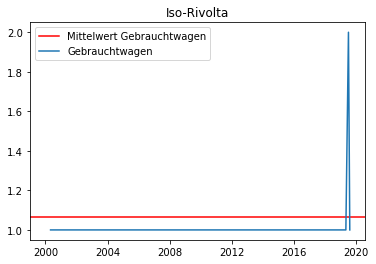

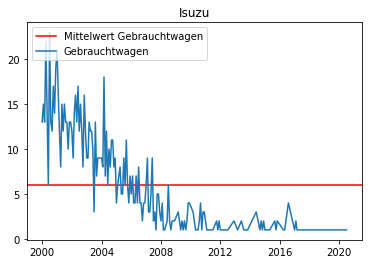

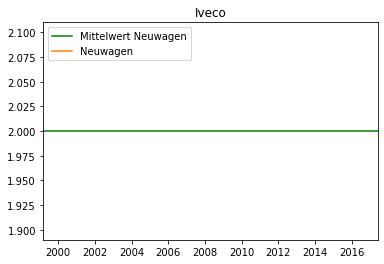

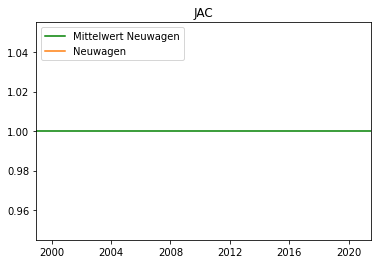

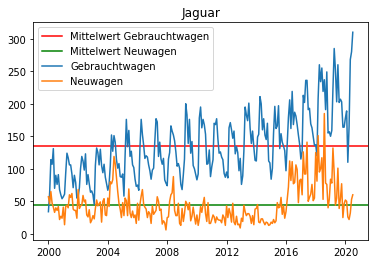

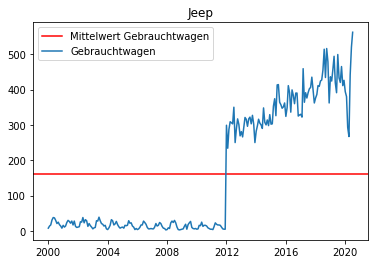

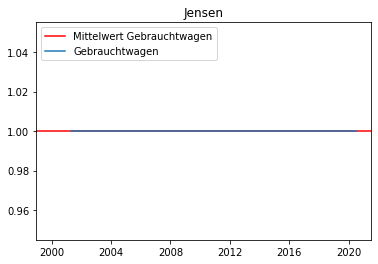

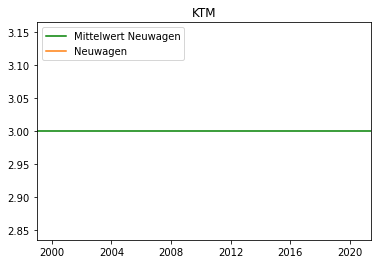

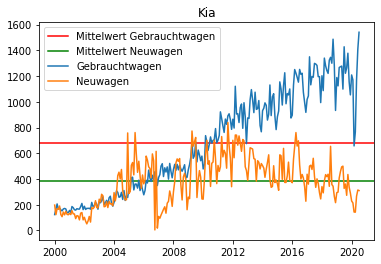

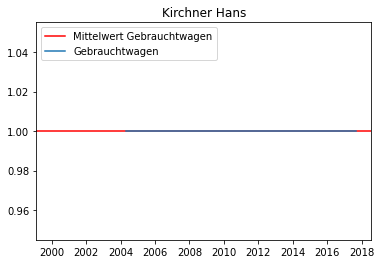

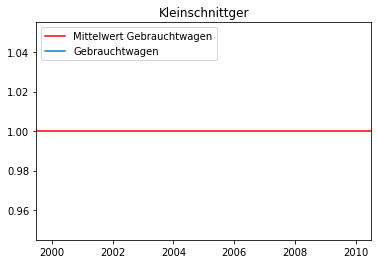

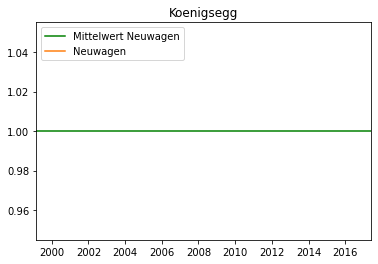

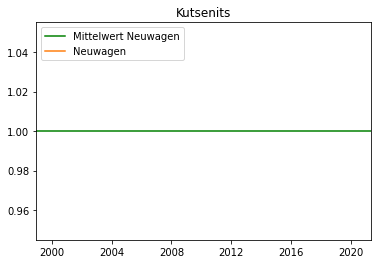

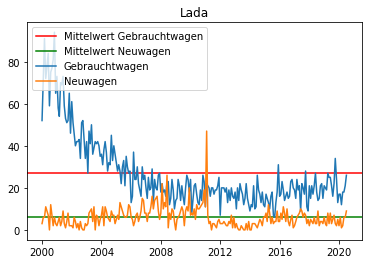

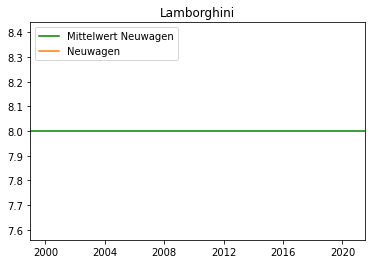

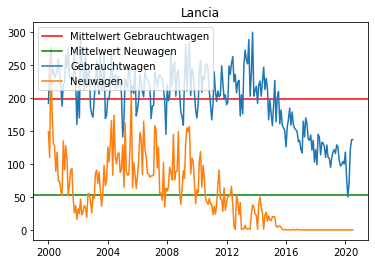

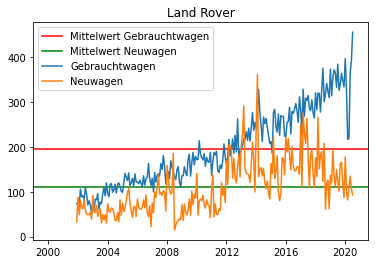

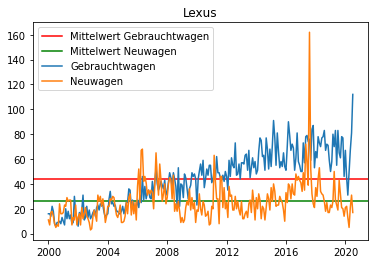

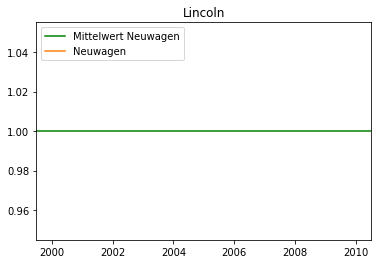

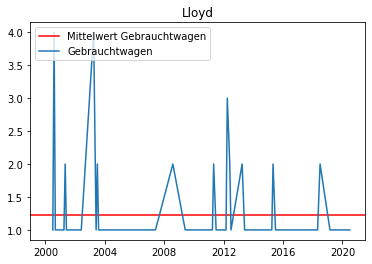

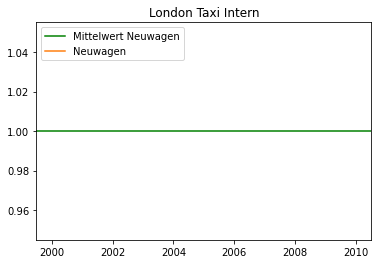

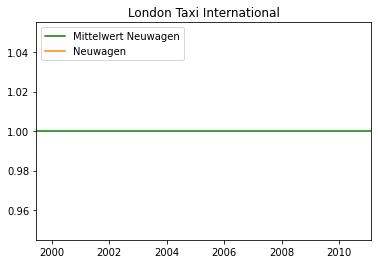

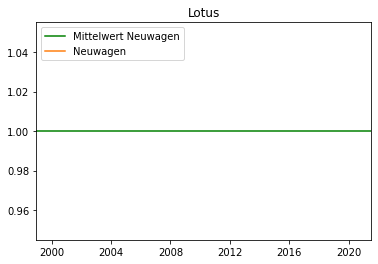

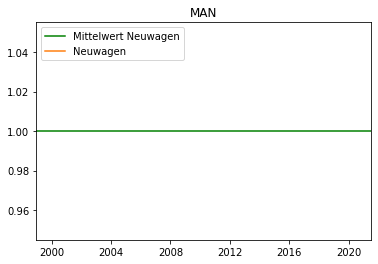

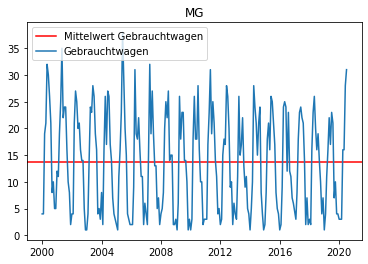

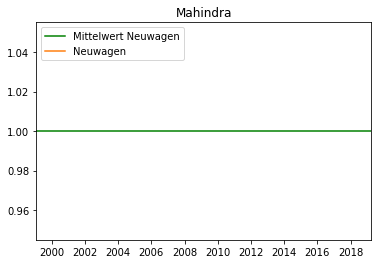

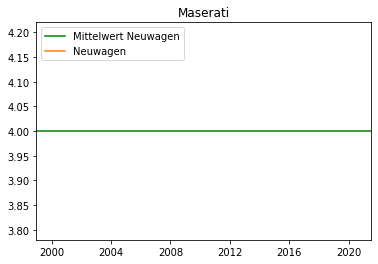

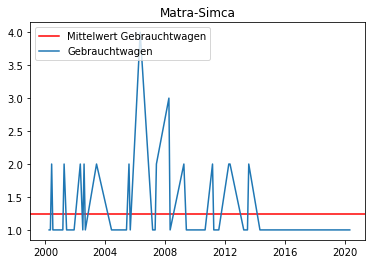

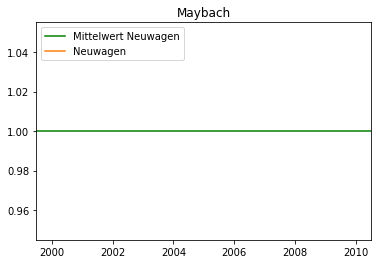

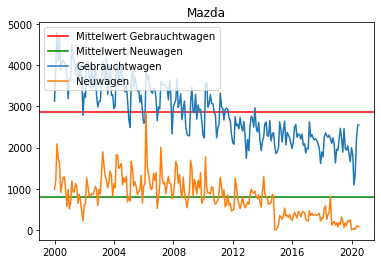

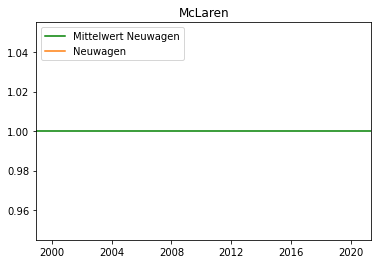

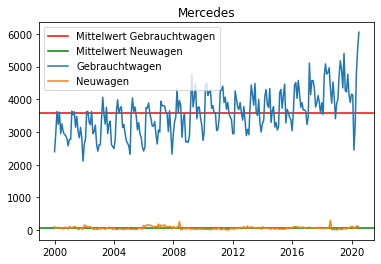

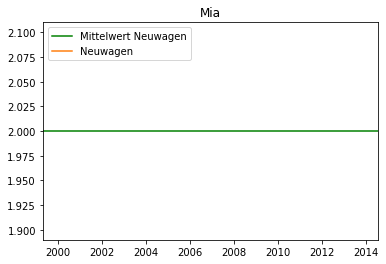

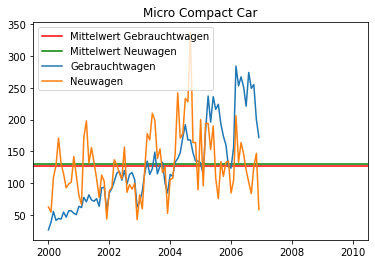

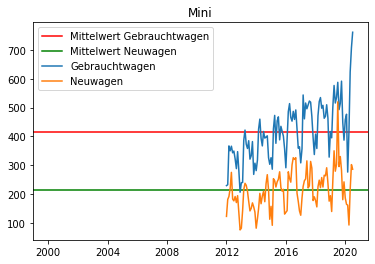

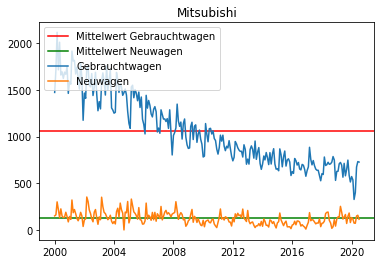

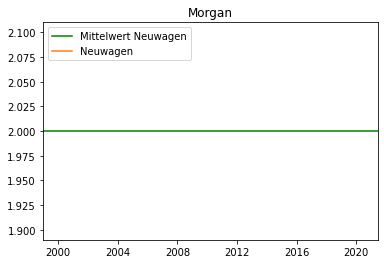

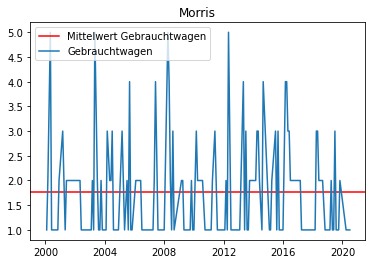

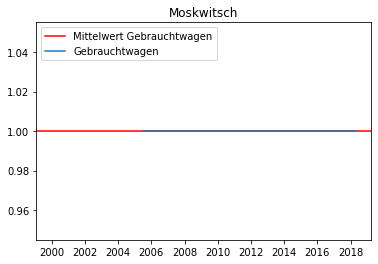

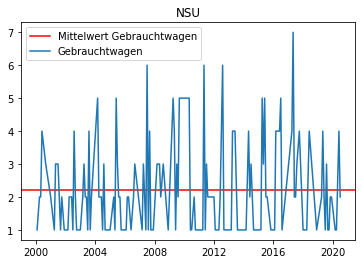

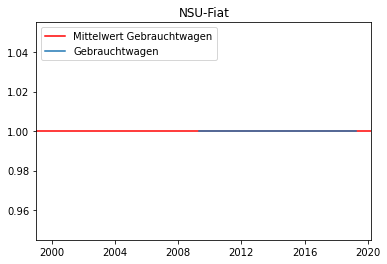

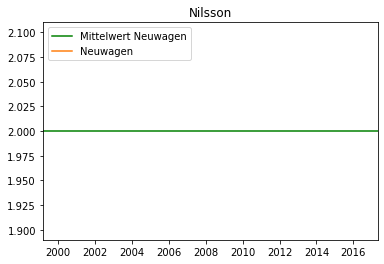

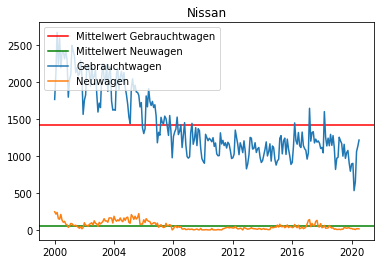

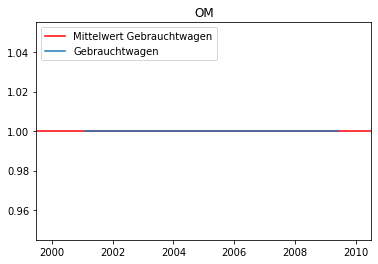

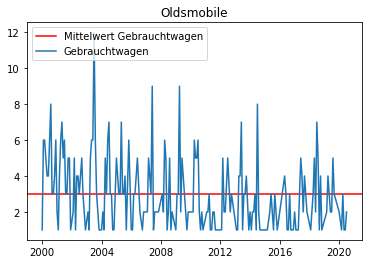

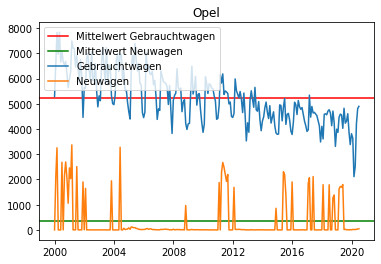

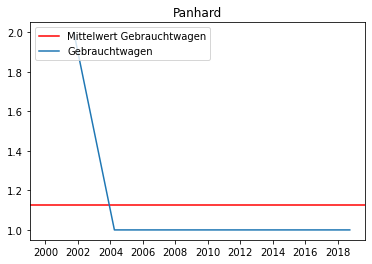

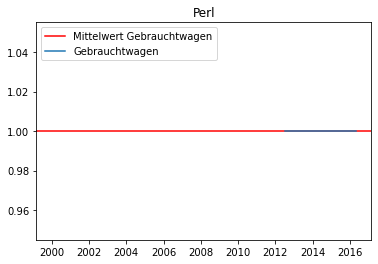

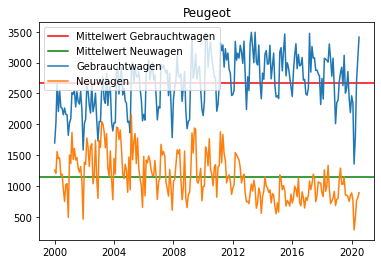

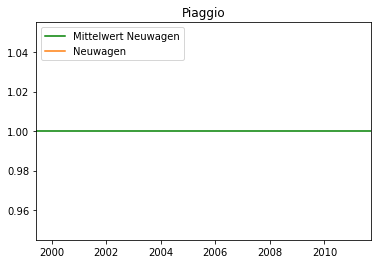

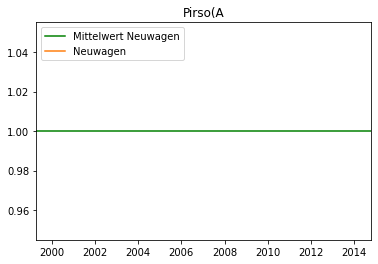

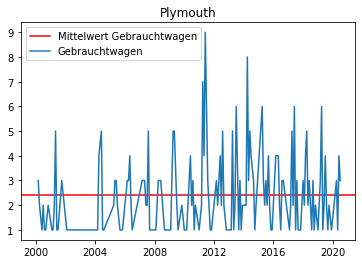

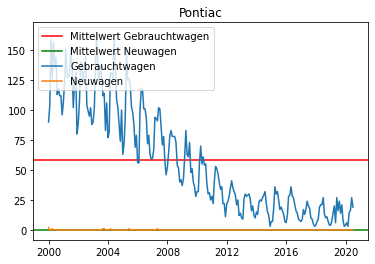

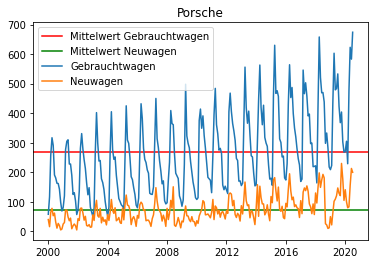

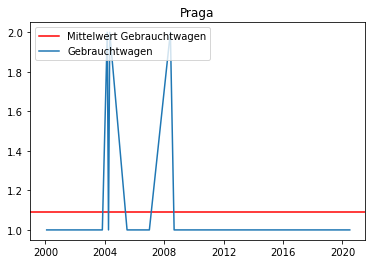

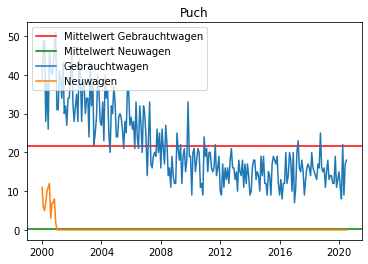

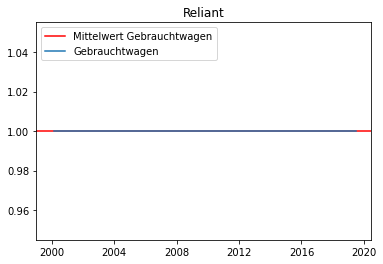

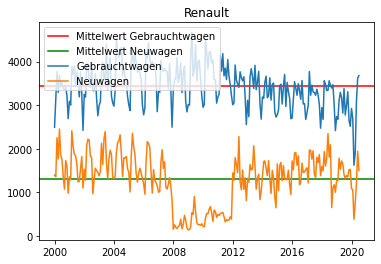

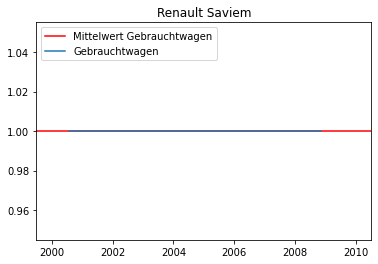

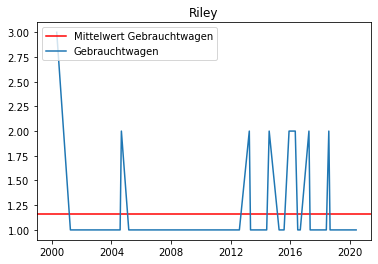

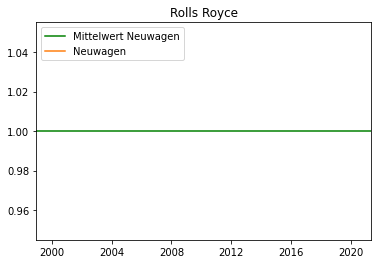

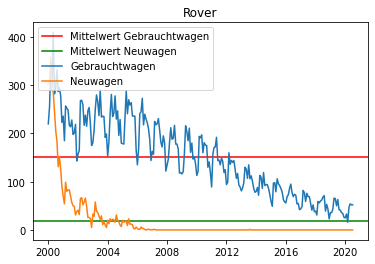

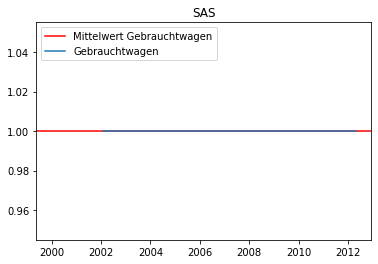

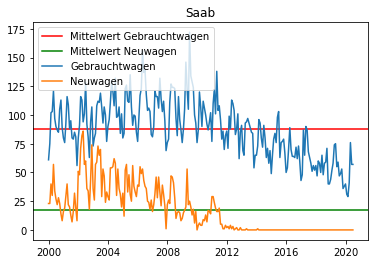

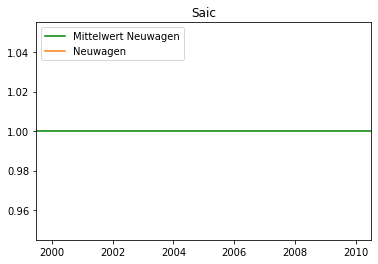

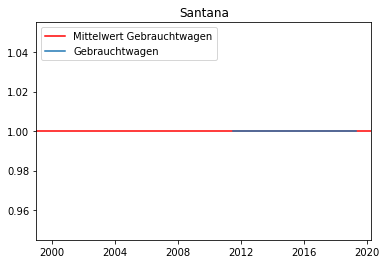

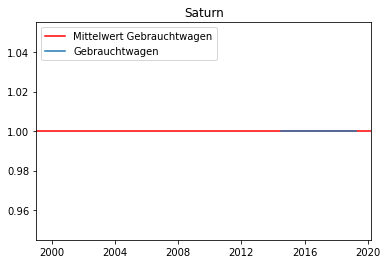

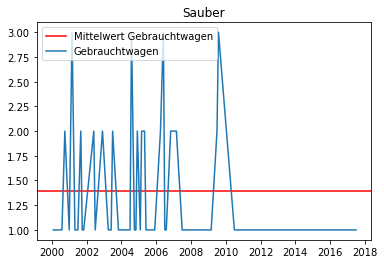

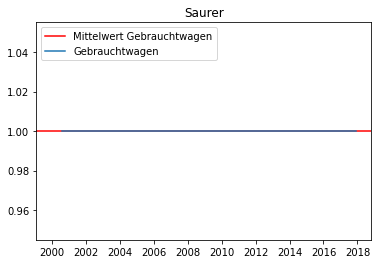

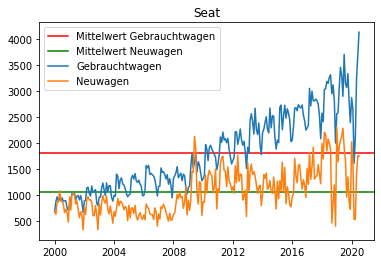

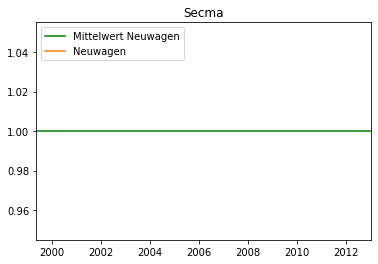

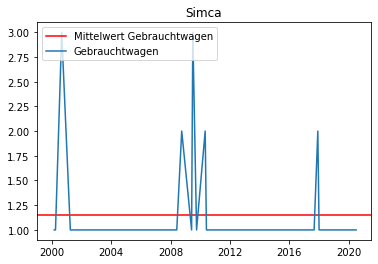

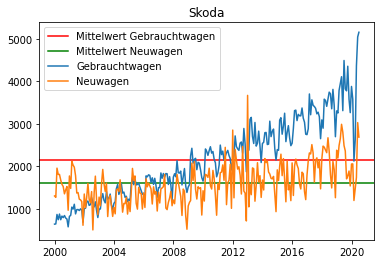

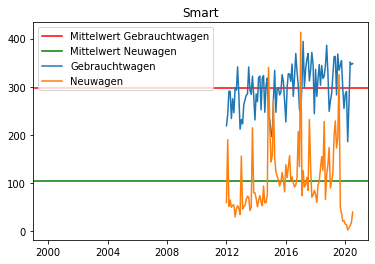

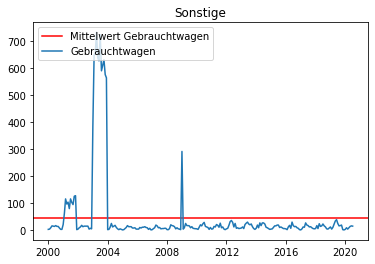

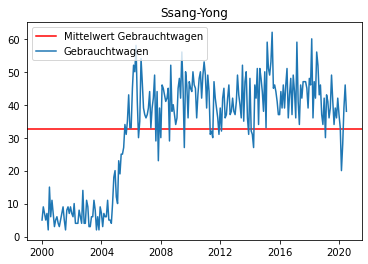

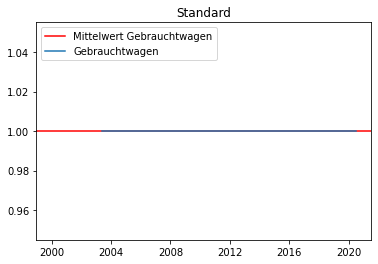

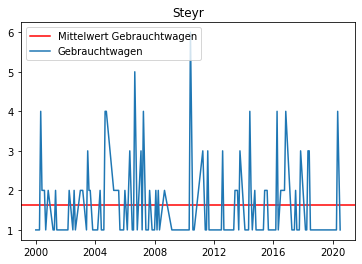

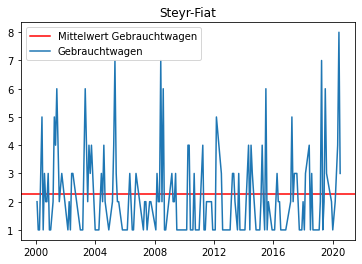

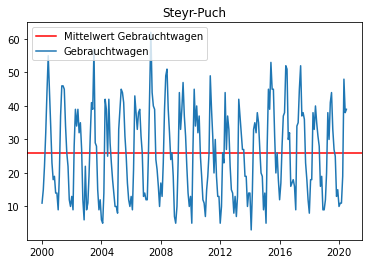

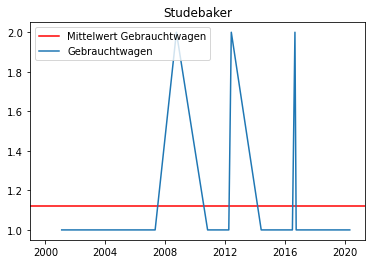

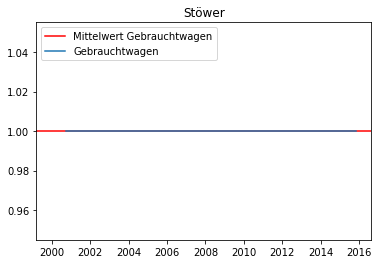

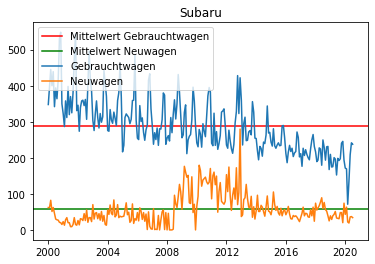

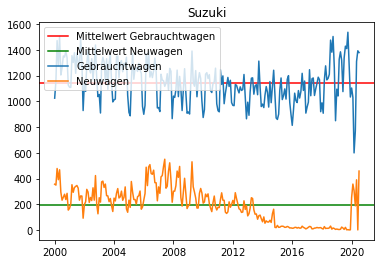

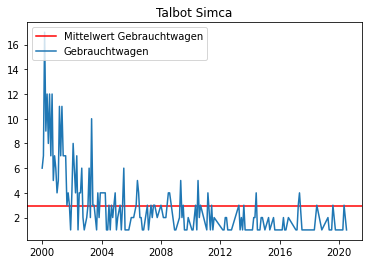

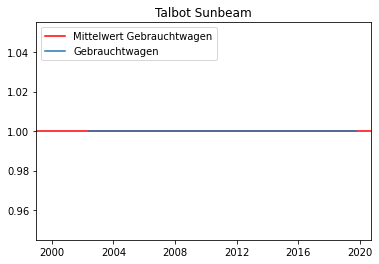

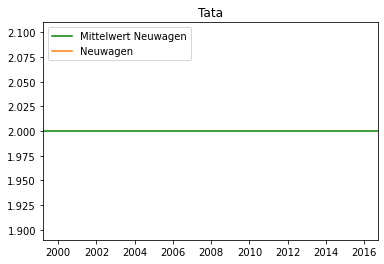

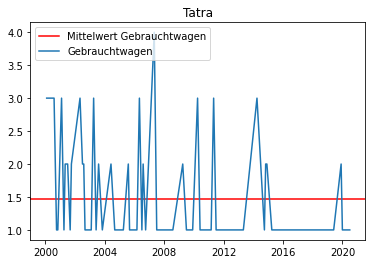

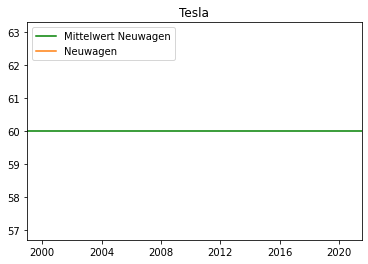

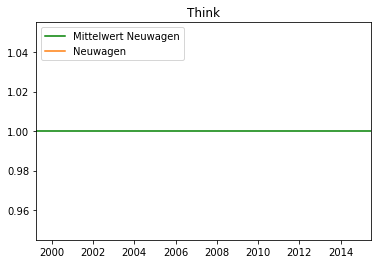

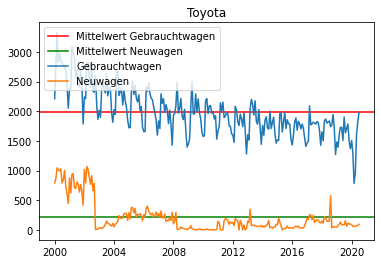

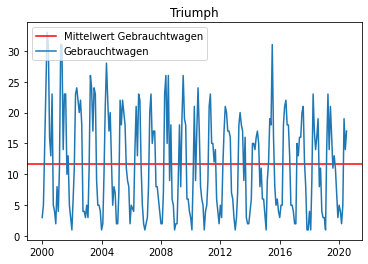

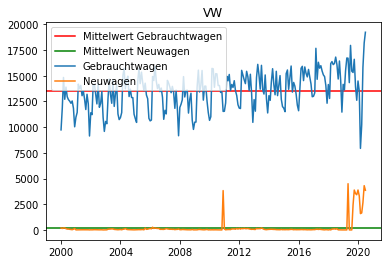

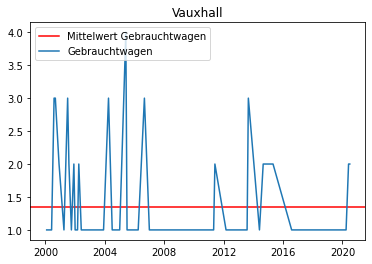

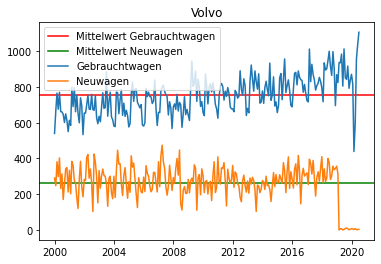

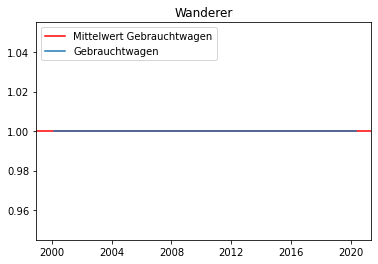

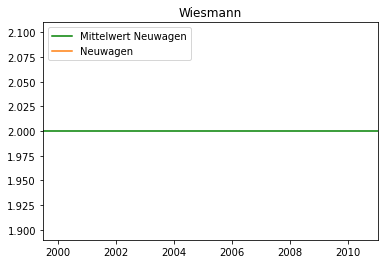

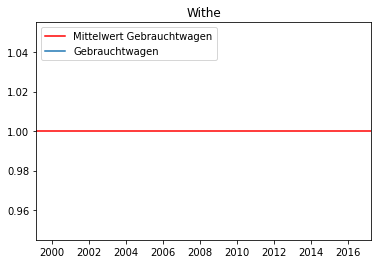

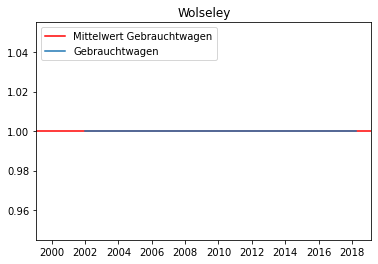

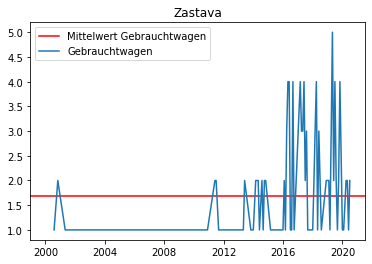

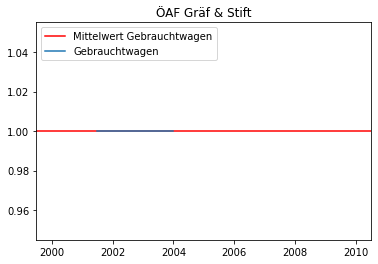

In [13]:
## Plot


print(display(HTML("<h2>Plot für alle Gebrauchtwägen</h2>")))
datumList = []
anzahlListGebrauchtwagen = []
anzahlListNeuwagen = []
for key in sorted(gesamt):
    datumList.append(key)
    anzahlListGebrauchtwagen.append(gesamt.get(key).get("Gebrauchtwagen"))
    anzahlListNeuwagen.append(gesamt.get(key).get("Neuwagen"))

fig=plt.figure()
#fig.show()
ax=fig.add_subplot(111)

plt.axhline(sum(anzahlListGebrauchtwagen) / len(anzahlListGebrauchtwagen), c='red', label="Mittelwert Gebrauchtwagen")
plt.axhline(sum(anzahlListNeuwagen) / len(anzahlListNeuwagen), c='green', label="Mittelwert Neuwagen")

ax.plot(datumList, anzahlListGebrauchtwagen,label='Gebrauchtwagen')
ax.plot(datumList, anzahlListNeuwagen,label='Neuwagen')

plt.legend(loc=2)
plt.show()



print(display(HTML("<h2>Plot für Einzelne Marken</h2>")))
for keymarke in sorted(marken):
    
    datum = []
    anzahl_neu = []
    anzahl_gebraucht = []
    
    for keydatum in sorted (marken.get(keymarke)):
        datum.append(keydatum)
        anzahl_neu.append(marken.get(keymarke).get(keydatum).get('Neuwagen'))
        anzahl_gebraucht.append(marken.get(keymarke).get(keydatum).get('Gebrauchtwagen'))

        
    fig=plt.figure()
    fig.show()
    
    #Plot both
    if anzahl_neu[0] != 0 and anzahl_gebraucht[0] != 0:
        ax=fig.add_subplot(111)
        ax.title.set_text(keymarke)
        plt.axhline(sum(anzahl_gebraucht) / len(anzahl_gebraucht), c='red', label="Mittelwert Gebrauchtwagen")
        plt.axhline(sum(anzahl_neu) / len(anzahl_neu), c='green', label="Mittelwert Neuwagen")


        ax.plot(datum, anzahl_gebraucht, c='#1f77b4', label='Gebrauchtwagen')
        ax.plot(datum, anzahl_neu, c='#ff7f0e', label='Neuwagen')

        plt.legend(loc=2)
        plt.show()
    #Only plot Gebrauchtwagen
    elif anzahl_neu[0] == 0 and anzahl_gebraucht[0] != 0:
        ax=fig.add_subplot(111)
        ax.title.set_text(keymarke)
        plt.axhline(sum(anzahl_gebraucht) / len(anzahl_gebraucht), c='red', label="Mittelwert Gebrauchtwagen")

        ax.plot(datum, anzahl_gebraucht,c='#1f77b4', label='Gebrauchtwagen')


        plt.legend(loc=2)
        plt.show()
    #Only plot Neuwage
    elif anzahl_neu[0] != 0 and anzahl_gebraucht[0] == 0:
        ax=fig.add_subplot(111)
        ax.title.set_text(keymarke)
        plt.axhline(sum(anzahl_neu) / len(anzahl_neu), c='green', label="Mittelwert Neuwagen")


        ax.plot(datum, anzahl_neu, c='#ff7f0e', label='Neuwagen')


        plt.legend(loc=2)
        plt.show()

In [15]:
# Export
import os

os.system('jupyter nbconvert --output-dir="../../kienil.github.io/pkw-zulassung" --TemplateExporter.exclude_input=True --to html pkw-zulassung.ipynb --output pkw_diagramm.html')
os.system('jupyter nbconvert --output-dir="../../kienil.github.io/pkw-zulassung" --to html pkw-zulassung.ipynb --output pkw_developer.html')


0